In [16]:
# for basic operations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Lets read the Dataset
data = pd.read_csv('../data/raw/bigmart.csv')

# lets check the shape of the dataset
data.shape

(8523, 12)

In [18]:
# lets check the head of the dataset
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
# lets First Check for the Missing Values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
# lets Impute the Missing Values
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

# lets Check the Missing Values again
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

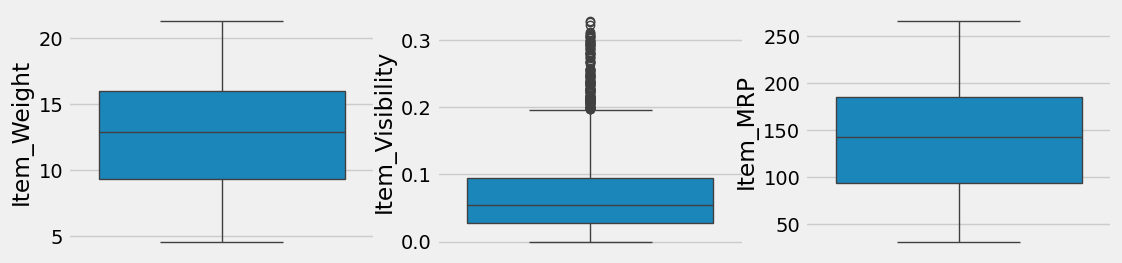

In [21]:
# Lets Check for Outliers in Item Weight, Item Visibility, and Item MRP

plt.rcParams['figure.figsize'] = (12, 3)
plt.style.use('fivethirtyeight')

plt.subplot(1, 3, 1)
sns.boxplot(data['Item_Weight'])

plt.subplot(1, 3, 2)
sns.boxplot(data['Item_Visibility'])

plt.subplot(1, 3, 3)
sns.boxplot(data['Item_MRP'])
plt.show()

In [22]:
data['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

<Axes: ylabel='Item_Visibility'>

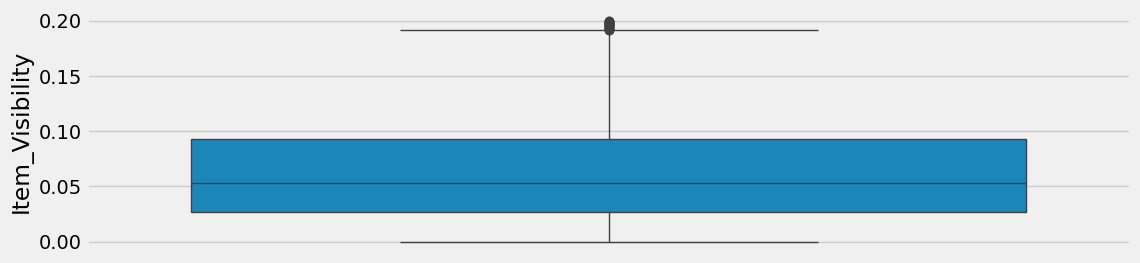

In [23]:
# Item Visibility has some Outliers, LET'S remove them
data = data[data['Item_Visibility'] <= 0.2]

# lets check the Item Visibility again
sns.boxplot(data['Item_Visibility'])

In [24]:
data['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8389, dtype: object

In [25]:
# Now lets Clean the Item Identifiers
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

# lets check the values
data['Item_Identifier'].value_counts()

Item_Identifier
FD    6016
NC    1583
DR     790
Name: count, dtype: int64

In [26]:
# lets Check the Item_Fat Content
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5024
Regular    2832
LF          307
reg         117
low fat     109
Name: count, dtype: int64

In [27]:
# lets Clean the Values
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(('low fat', 'LF','reg'), ('Low Fat', 'Low Fat', 'Regular'))

#lets check teh values
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5440
Regular    2949
Name: count, dtype: int64